In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Thesis/

/content/drive/MyDrive/Thesis


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis/final_en_data.csv')
df.head()

,headline,content,label
0,"Invoking religion, a more disciplined Trump sp...","GREENVILLE, N.C., Va./WASHINGTON (Reuters) - R...",1
1,Top Trump lieutenant Scaramucci lashes colleag...,(Note: Strong language in paragraph 3) By Ste...,1
2,Let Us Now Praise Famous Trumps,"November 7, 2016, 10:26 pm A+ | a- Warning \...",0
3,U.S. seeks ship ban over North Korea violation...,UNITED NATIONS/WASHINGTON (Reuters) - The Unit...,1
4,Links 11/3/16,"November 3, 2016 at 7:14 am \nHostility toward...",0


In [ ]:
df['headline'].str.len().mean()


69.00044563279857

In [ ]:
df['content'].str.len().mean()

4075.9206619952056

In [ ]:
df1 = df.loc[df['label']==0]
df2 = df.loc[df['label']==1]
df3=df2.sample(35000)

In [ ]:
frames = [df1, df3]
result = pd.concat(frames)
#df = result.reindex()
df = result.sample(frac=1).reset_index(drop=True)
df['label'].value_counts()

1    35000
0    30076
Name: label, dtype: int64

In [ ]:
df_real = df[df['label'] == 1]
df_fake = df[df['label'] == 0]
df_real = df_real.sample(frac=1).reset_index(drop=True)
df_fake = df_fake.sample(frac=1).reset_index(drop=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

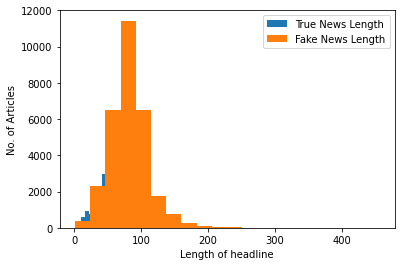

<Figure size 576x576 with 0 Axes>

In [ ]:
from google.colab import files
plt.figure()
plt.hist(df_real['headline'].str.len(), bins= 20 ,Label= 'True News Length')
plt.hist(df_fake['headline'].str.len(), bins=20,stacked= True, Label= 'Fake News Length')
plt.legend()
plt.xlabel('Length of headline')
plt.ylabel('No. of Articles')
plt.figure(figsize = (8, 8), facecolor = None) 
plt.savefig("average_word_length.png")
files.download("average_word_length.png") 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


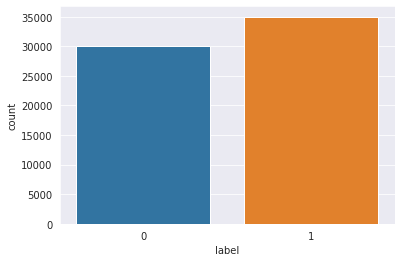

In [ ]:
sns.set_style("darkgrid")
sns.countplot(df['label']);

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


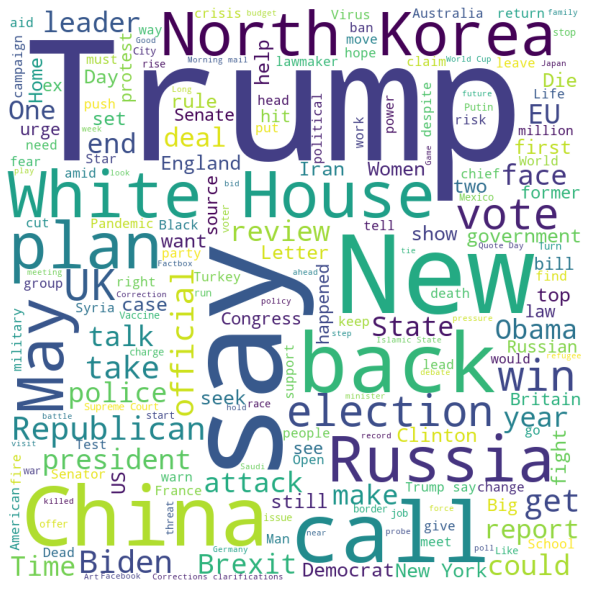

In [ ]:
#Check Wordcloud real headline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df[df['label'] == 1].headline)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

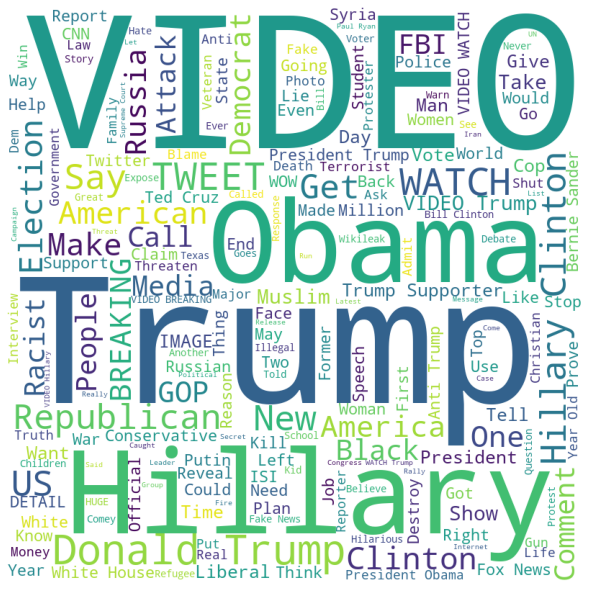

In [ ]:
#Check Wordcloud fake headline

from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df[df['label'] == 0].headline)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

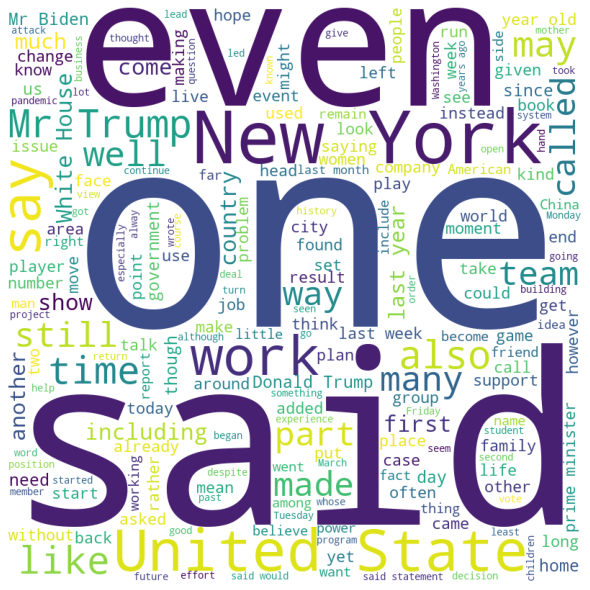

In [ ]:
#Check Wordcloud fake content

from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df[df['label'] == 1].content)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

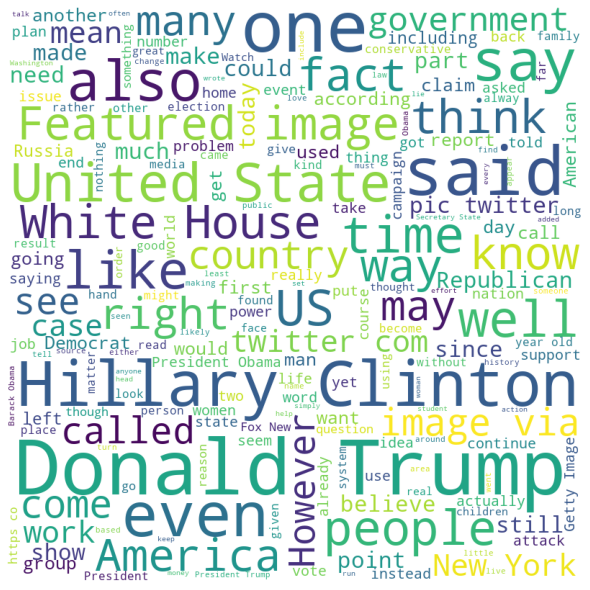

In [ ]:
#Check Wordcloud fake content

from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df[df['label'] == 0].content)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
#Most frequent words in real headline
from nltk.probability import FreqDist
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

ps = PorterStemmer()

corpus = []
for i in range(0, len(df_real)):
    review = re.sub('[^a-zA-Z]', ' ', df_real['headline'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tokenized_word=word_tokenize(str(corpus))
#print(tokenized_word)
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 22279 samples and 311436 outcomes>


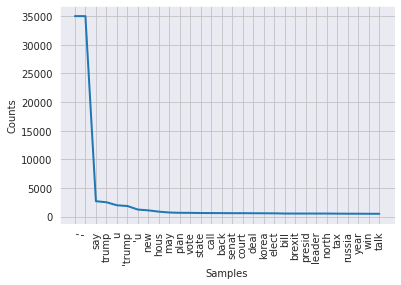

In [ ]:
fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
#Most frequent words in fake headline
from nltk.probability import FreqDist
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

ps = PorterStemmer()

corpus = []
for i in range(0, len(df_fake)):
    review = re.sub('[^a-zA-Z]', ' ', df_fake['headline'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokenized_word=word_tokenize(str(corpus))
#print(tokenized_word)
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 19043 samples and 337916 outcomes>


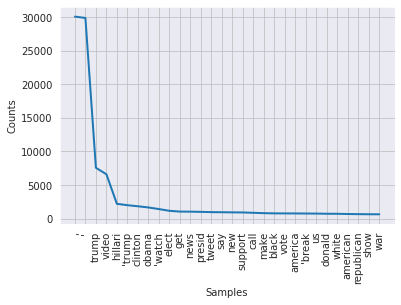

In [ ]:
fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
#Most frequent words in real content
from nltk.probability import FreqDist
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

ps = PorterStemmer()

corpus = []
for i in range(0, len(df_real)):
    review = re.sub('[^a-zA-Z]', ' ', df_real['content'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokenized_word=word_tokenize(str(corpus))
#print(tokenized_word)
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 140853 samples and 16106441 outcomes>


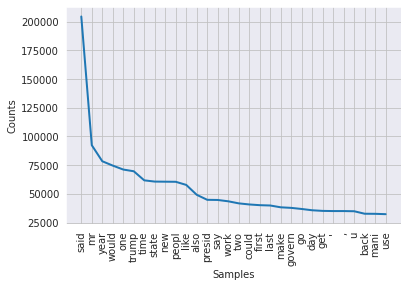

In [ ]:
fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
#Most frequent words in fake content
from nltk.probability import FreqDist
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

ps = PorterStemmer()

corpus = []
for i in range(0, len(df_fake)):
    review = re.sub('[^a-zA-Z]', ' ', df_fake['content'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokenized_word=word_tokenize(str(corpus))
#print(tokenized_word)
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 127218 samples and 8750486 outcomes>


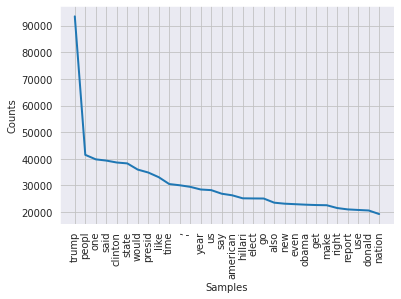

In [ ]:
fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer

#text = df_real['headline'][0]

stemmer = PorterStemmer()
words = nltk.word_tokenize(df_real['headline'][1])

#tokenizer = word_tokenize()
#tokenized_text = tokenizer.word_tokenizer(text)
word1s = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
#stem = stemmer.stem(tokenized_text)

print(f"Before stemming: {words}")
print(f'After stemming: {word1s}')

Before stemming: ['Trump-backed', 'Navy', 'expansion', 'would', 'boost', 'costs', 'some', '$', '400', 'billion', 'over', '30', 'years', ':', 'study']
After stemming: ['trump-back', 'navi', 'expans', 'would', 'boost', 'cost', '$', '400', 'billion', '30', 'year', ':', 'studi']
